# Super Store Sales Analysis

Dataset Link : https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel('Global_Superstore.xlsx')

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Category-Updated,Profit Category,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,Worse,Awesome,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,Worse,Worse,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,Worse,Worse,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,Worse,Worse,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,Worse,Worse,903.04,Critical


In [6]:
data.shape

(36596, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36596 entries, 0 to 36595
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Row ID                   36596 non-null  int64         
 1   Order ID                 36596 non-null  object        
 2   Order Date               36596 non-null  datetime64[ns]
 3   Ship Date                36596 non-null  datetime64[ns]
 4   Ship Mode                36596 non-null  object        
 5   Customer ID              36596 non-null  object        
 6   Customer Name            36596 non-null  object        
 7   Segment                  36596 non-null  object        
 8   Postal Code              6020 non-null   float64       
 9   City                     36596 non-null  object        
 10  State                    36596 non-null  object        
 11  Country                  36596 non-null  object        
 12  Region                   36596 n

# Checking the null values 

In [8]:
data.isnull().sum()

Row ID                         0
Order ID                       0
Order Date                     0
Ship Date                      0
Ship Mode                      0
Customer ID                    0
Customer Name                  0
Segment                        0
Postal Code                30576
City                           0
State                          0
Country                        0
Region                         0
Market                         0
Product ID                     0
Category                       0
Sub-Category                   0
Product Name                   0
Sales                          0
Quantity                       0
Discount                       0
Profit                         0
Profit Category-Updated        0
Profit Category                0
Shipping Cost                  0
Order Priority                 0
dtype: int64

# Handling the null values 

as the Postal Code column as multiple null values we will drop that column

In [9]:
data.drop(['Postal Code'], axis= 1, inplace=True)

In [10]:
data.isnull().sum()

Row ID                     0
Order ID                   0
Order Date                 0
Ship Date                  0
Ship Mode                  0
Customer ID                0
Customer Name              0
Segment                    0
City                       0
State                      0
Country                    0
Region                     0
Market                     0
Product ID                 0
Category                   0
Sub-Category               0
Product Name               0
Sales                      0
Quantity                   0
Discount                   0
Profit                     0
Profit Category-Updated    0
Profit Category            0
Shipping Cost              0
Order Priority             0
dtype: int64

checking the columns present in the dataset 

In [12]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Category-Updated', 'Profit Category', 'Shipping Cost',
       'Order Priority'],
      dtype='object')

In [13]:
import datetime as dt

In [14]:
data['order_month'] = data['Order Date'].dt.month
data['order_year'] = data['Order Date'].dt.year
data['ship_month'] = data['Ship Date'].dt.month
data['ship_year'] = data['Ship Date'].dt.year

In [15]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Profit Category-Updated,Profit Category,Shipping Cost,Order Priority,order_month,order_year,ship_month,ship_year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,0.0,62.1544,Worse,Awesome,40.77,High,11,2014,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,Worse,Worse,923.63,Critical,2,2014,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,Worse,Worse,915.49,Medium,10,2014,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,Worse,Worse,910.16,Medium,1,2014,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,Worse,Worse,903.04,Critical,11,2014,11,2014


# Checking the unique values in each column

In [17]:
data['order_year'].unique()

array([2014, 2012, 2013, 2015], dtype=int64)

In [18]:
data['ship_year'].unique()

array([2014, 2012, 2013, 2015, 2016], dtype=int64)

In [19]:
data['Ship Mode'].unique()

array(['First Class', 'Second Class', 'Same Day', 'Standard Class'],
      dtype=object)

In [20]:
data.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [21]:
data.Region.unique()

array(['Central US', 'Oceania', 'Western Europe', 'Western Africa',
       'Western US', 'Southern Asia', 'Western Asia', 'South America',
       'Eastern Asia', 'Southern Europe', 'Eastern Africa',
       'Eastern Europe', 'Northern Europe', 'Central America',
       'Eastern US', 'Caribbean', 'Central Africa', 'Southeastern Asia',
       'Southern US', 'North Africa', 'Southern Africa', 'Canada',
       'Central Asia'], dtype=object)

In [22]:
data.Market.unique()

array(['USCA', 'Asia Pacific', 'Europe', 'Africa', 'LATAM'], dtype=object)

In [23]:
data.Category.unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [24]:
data['Sub-Category'].unique()

array(['Phones', 'Chairs', 'Copiers', 'Tables', 'Bookcases', 'Art',
       'Appliances', 'Storage', 'Fasteners', 'Machines', 'Accessories',
       'Furnishings', 'Binders', 'Labels', 'Paper', 'Supplies',
       'Envelopes'], dtype=object)

# Which category products are sold most of the time 

In [25]:
data.Category.value_counts()

Office Supplies    19306
Technology          8942
Furniture           8348
Name: Category, dtype: int64

<Axes: >

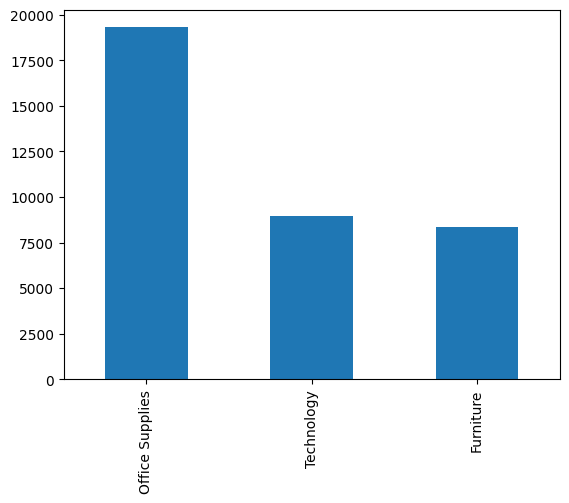

In [26]:
data.Category.value_counts().plot(kind='bar')

Office Supplies followed by Technology and Furniture and sold most no of times

# which subcategory are most sold?

In [28]:
data.rename({'Sub-Category' : 'sub_category'}, axis=1,inplace= True)

In [29]:
data.sub_category.value_counts().head(10)

Storage        3868
Art            3253
Binders        3121
Chairs         3046
Phones         2911
Accessories    2495
Furnishings    2296
Bookcases      2289
Paper          2263
Copiers        2172
Name: sub_category, dtype: int64

<Axes: >

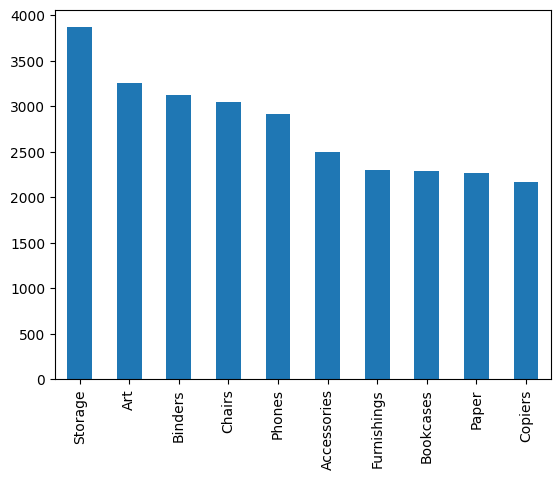

In [30]:
 data.sub_category.value_counts().head(10).plot(kind='bar')

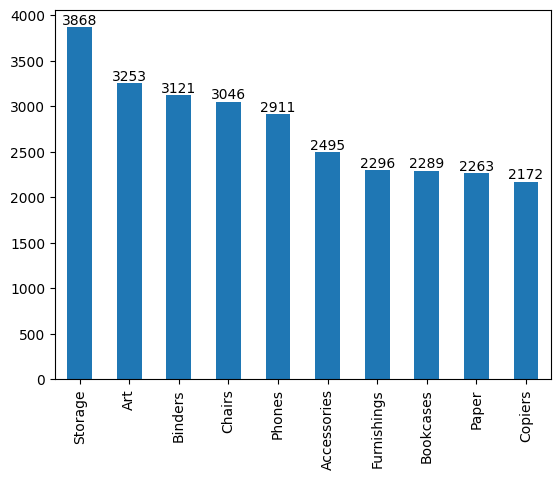

In [31]:
top_category = data.sub_category.value_counts().head(10)
ax= top_category.plot(kind='bar')

for i, value in enumerate(top_category):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

The Storage sub-category has the highest sales, followed by Art and Paper, while Copiers is the least sold sub-category.

# Top 10 products sold

In [33]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'sub_category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Category-Updated', 'Profit Category', 'Shipping Cost',
       'Order Priority', 'order_month', 'order_year', 'ship_month',
       'ship_year'],
      dtype='object')

In [34]:
data['Product Name'].value_counts().head(10)

Staples                                       150
Eldon File Cart, Single Width                  89
Rogers File Cart, Single Width                 80
Smead File Cart, Single Width                  69
Tenex File Cart, Single Width                  67
Sanford Pencil Sharpener, Water Color          53
Apple Smart Phone, Full Size                   51
Cardinal Binding Machine, Economy              48
Hon Executive Leather Armchair, Adjustable     48
Fellowes File Cart, Wire Frame                 46
Name: Product Name, dtype: int64

<Axes: >

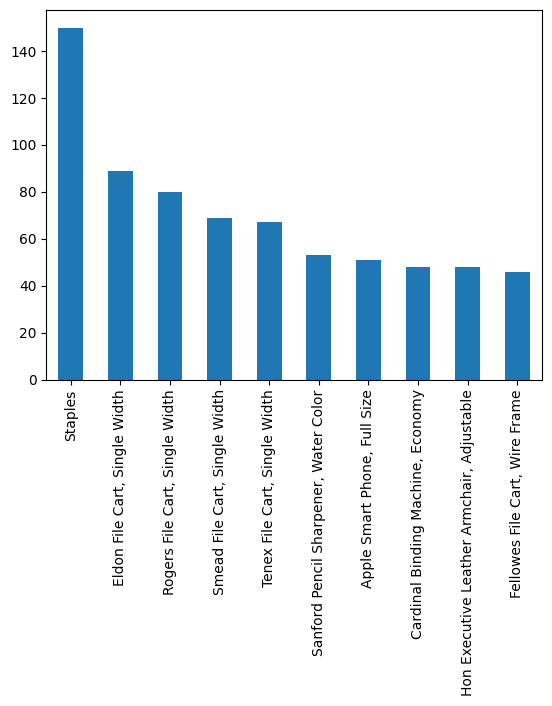

In [35]:
data['Product Name'].value_counts().head(10).plot(kind='bar')

Staples is the top-selling item, with sales that are 69% higher than those of the Fellowes File Carts and Wire Frames.

# Which shipping mode was more prefered?

In [37]:
data['Ship Mode'].value_counts()

Standard Class    21021
Second Class       7634
First Class        5873
Same Day           2068
Name: Ship Mode, dtype: int64

<Axes: >

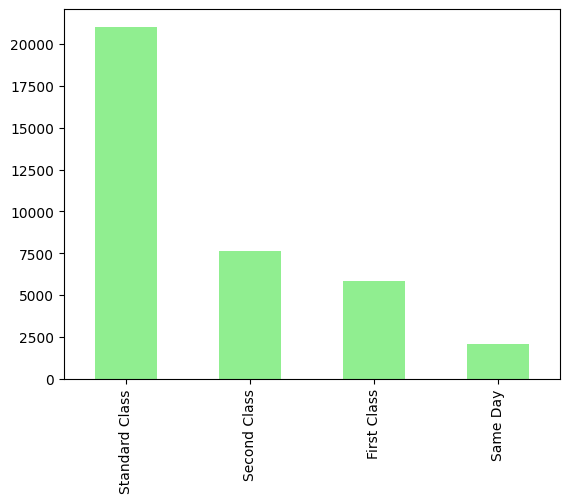

In [38]:
data['Ship Mode'].value_counts().plot(kind='bar', color='lightgreen')

Standard shipping mode was the most likely pefered.

# which category has highest sales?

In [40]:
data.groupby('Category').Sales.sum().sort_values(ascending=False)

Category
Technology         4.328241e+06
Furniture          3.756977e+06
Office Supplies    3.265103e+06
Name: Sales, dtype: float64

<Axes: xlabel='Category'>

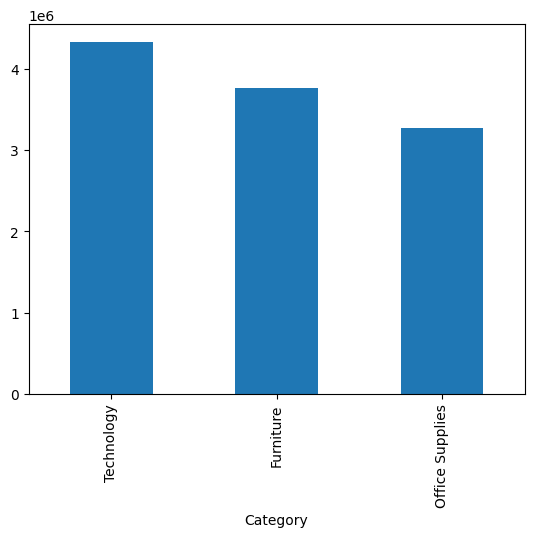

In [41]:
data.groupby('Category').Sales.sum().sort_values(ascending=False).plot(kind='bar')

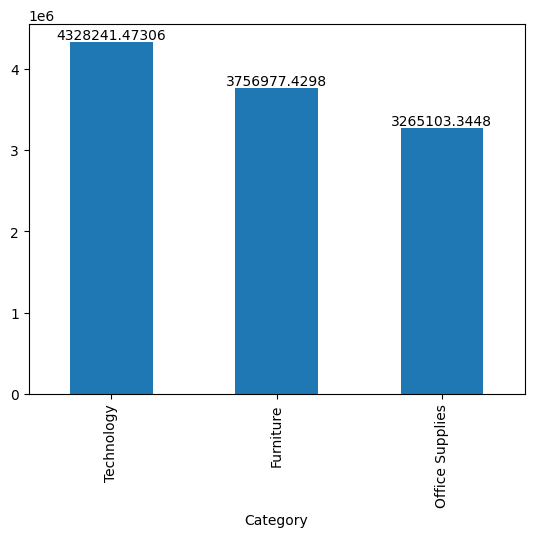

In [42]:
top_sales = data.groupby('Category').Sales.sum().sort_values(ascending=False)
ax = top_sales.plot(kind='bar')

for i, value in enumerate(top_sales):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')

The Technology category has the highest sales, while the Office Supplies category has the lowest.

# whcih sub_category has highest sales?

In [43]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'sub_category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Category-Updated', 'Profit Category', 'Shipping Cost',
       'Order Priority', 'order_month', 'order_year', 'ship_month',
       'ship_year'],
      dtype='object')

In [44]:
data.groupby('sub_category').Sales.sum().sort_values(ascending= False)

sub_category
Phones         1.551886e+06
Copiers        1.437049e+06
Bookcases      1.404026e+06
Chairs         1.360429e+06
Storage        1.003250e+06
Appliances     9.638492e+05
Machines       6.759680e+05
Accessories    6.633376e+05
Tables         6.600070e+05
Binders        3.339208e+05
Furnishings    3.325148e+05
Art            3.216713e+05
Supplies       2.149840e+05
Paper          1.903842e+05
Envelopes      1.393333e+05
Fasteners      5.760524e+04
Labels         4.010487e+04
Name: Sales, dtype: float64

<Axes: ylabel='sub_category'>

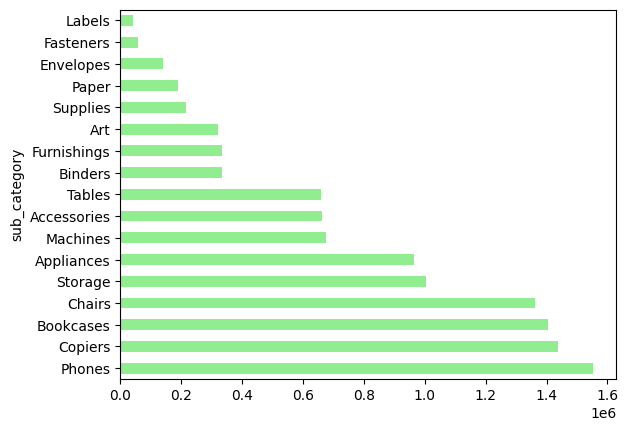

In [45]:
data.groupby('sub_category').Sales.sum().sort_values(ascending= False).plot(kind= 'barh', color= 'lightgreen')

Phones have the highest sales at approximately 1.55 million, while Labels have the lowest sales at around 40,100.

# sales by sub_category within the category

In [48]:
pd.pivot_table(data, index =['Category', 'sub_category'], values= 'Sales', aggfunc=sum).round()

Sales
Category        sub_category           
Furniture       Bookcases     1404026.0
                Chairs        1360429.0
                Furnishings    332515.0
                Tables         660007.0
Office Supplies Appliances     963849.0
                Art            321671.0
                Binders        333921.0
                Envelopes      139333.0
                Fasteners       57605.0
                Labels          40105.0
                Paper          190384.0
                Storage       1003250.0
                Supplies       214984.0
Technology      Accessories    663338.0
                Copiers       1437049.0
                Machines       675968.0
                Phones        1551886.0

The subcategory and product with the highest sales in each category:

Furniture: Bookcases - 1,404,026.0
Office Supplies: Appliances - 963,849.0
Technology: Phones - 1,551,886.0

# which market has more sales?

In [50]:
data.groupby('Market').Sales.sum().sort_values(ascending=False)

Market
Asia Pacific    3.933582e+06
Europe          3.197821e+06
LATAM           2.083453e+06
USCA            1.391237e+06
Africa          7.442288e+05
Name: Sales, dtype: float64

<Axes: xlabel='Market'>

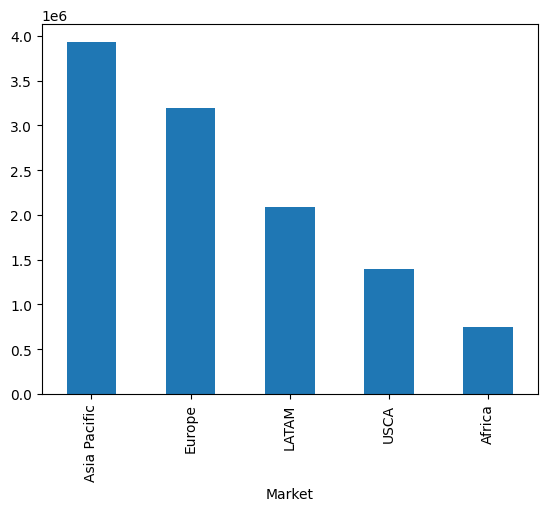

In [51]:
data.groupby('Market').Sales.sum().sort_values(ascending=False).plot(kind='bar')

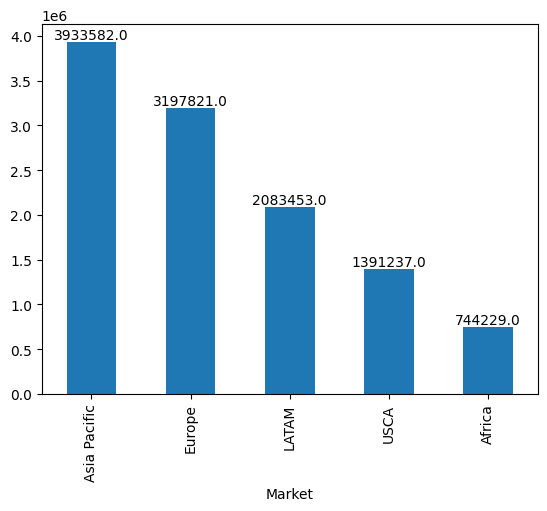

In [52]:
market_sales = data.groupby('Market').Sales.sum().sort_values(ascending=False).round()
ax = market_sales.plot(kind='bar')

for i, value in enumerate(market_sales):
    ax.text(i,value + 0.1, str(value), ha='center', va='bottom')

 Asia Pacific leads with approximately 3.93 million in sales, while Africa has the lowest at around 744,228.

# top 10 countries with the most sales 

In [53]:
data.groupby('Country').Sales.sum().sort_values(ascending = False).head(10)

Country
United States     1.352142e+06
Australia         9.064591e+05
France            8.373994e+05
China             6.882290e+05
Germany           6.154545e+05
Mexico            5.994244e+05
India             5.776659e+05
United Kingdom    5.113115e+05
Indonesia         3.921533e+05
Brazil            3.476441e+05
Name: Sales, dtype: float64

<Axes: ylabel='Country'>

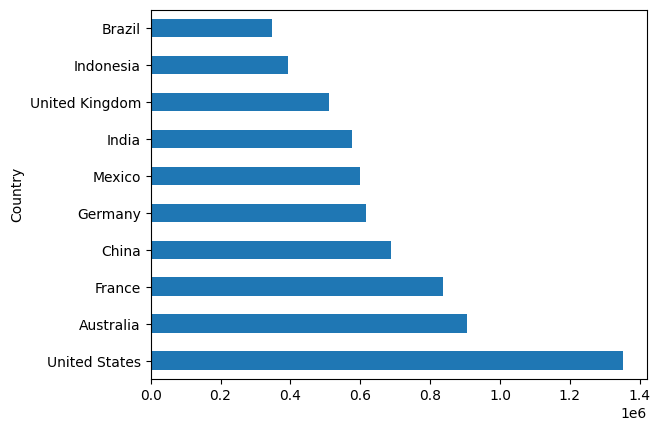

In [54]:
data.groupby('Country').Sales.sum().sort_values(ascending = False).head(10).plot(kind='barh')


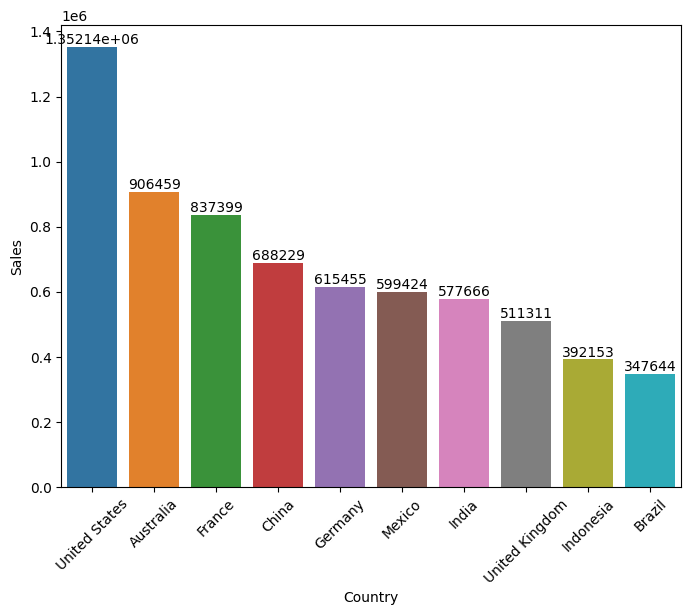

In [55]:
country_sales= data.groupby('Country').Sales.sum().sort_values(ascending = False).head(10).round()
country_sales = country_sales.reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(data= country_sales, x='Country', y='Sales')
plt.xticks(rotation= 45)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# which are the countries with the least sales ?

In [56]:
data.groupby('Country').Sales.sum().sort_values(ascending = False).tail(10)

Country
Burundi              267.720
Tajikistan           235.332
French Guiana        224.060
Macedonia            198.660
Eritrea              169.920
Bhutan               164.070
Armenia              136.260
Equatorial Guinea    124.290
Oman                  61.080
Belize                57.720
Name: Sales, dtype: float64

<Axes: ylabel='Country'>

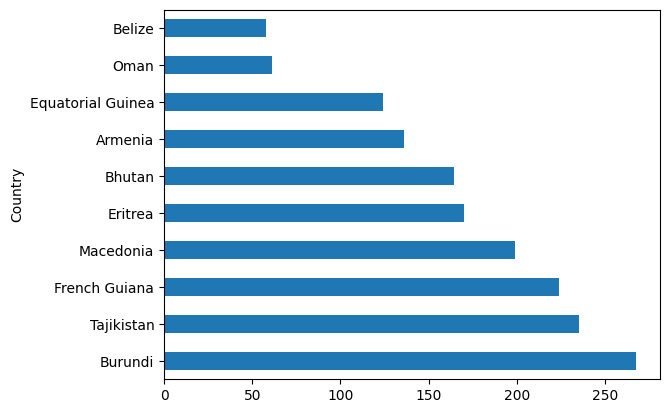

In [57]:
data.groupby('Country').Sales.sum().sort_values(ascending = False).tail(10).plot(kind='barh')

Among the listed countries, Burundi has the highest sales at 267.720, while Belize has the lowest at 57.720.

# How does the sales vary along the differnet regions?

In [59]:
data.groupby('Region').Sales.sum().sort_values(ascending = False).round()

Region
Western Europe       1691004.0
Central America      1178008.0
Oceania              1077807.0
Southeastern Asia     858453.0
Southern Asia         846198.0
Eastern Asia          838468.0
Northern Europe       614199.0
South America         594450.0
Southern Europe       594069.0
Western US            437138.0
Eastern US            403407.0
Caribbean             310995.0
Eastern Europe        298549.0
Western Asia          294997.0
Central US            284421.0
Southern US           227176.0
North Africa          220955.0
Western Africa        160366.0
Central Africa        139187.0
Eastern Africa        121637.0
Southern Africa       102084.0
Canada                 39094.0
Central Asia           17660.0
Name: Sales, dtype: float64

<Axes: xlabel='Region'>

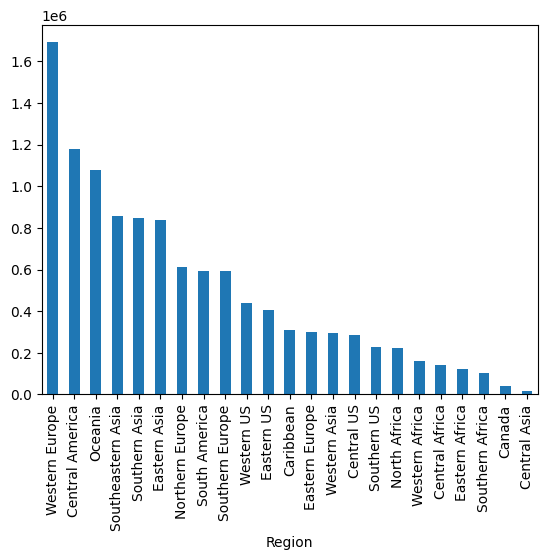

In [60]:
data.groupby('Region').Sales.sum().sort_values(ascending = False).plot(kind='bar')

Western Europe has the highest sales at 1,691,004.0, while Central Asia has the lowest at 17,660.0.

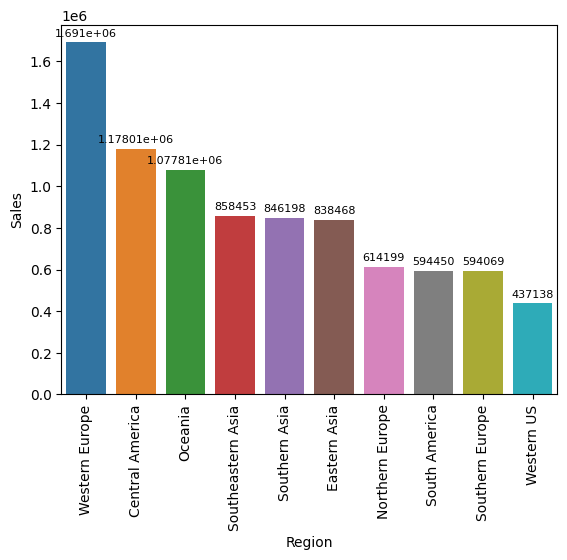

In [61]:
region_sale = data.groupby('Region').Sales.sum().sort_values(ascending = False).head(10)
region_sale = region_sale.reset_index()
ax = sns.barplot(data= region_sale, x='Region', y= 'Sales')
plt.xticks(rotation=90)
for bars in ax.containers:
    ax.bar_label(bars,  fontsize=8, padding=3)

The above graph highlights the top regions with comparatively high sales figures relative to others.

# which shipping mode has collected the most shipping charges in total?

In [63]:
data.rename({'Shipping Cost': 'Shipping_Cost'},axis=1, inplace=True)
data.groupby('Ship Mode').Shipping_Cost.sum().sort_values(ascending = False)

Ship Mode
Standard Class    562735.09700
Second Class      286618.52936
First Class       280150.85600
Same Day          104537.58300
Name: Shipping_Cost, dtype: float64

<Axes: xlabel='Ship Mode'>

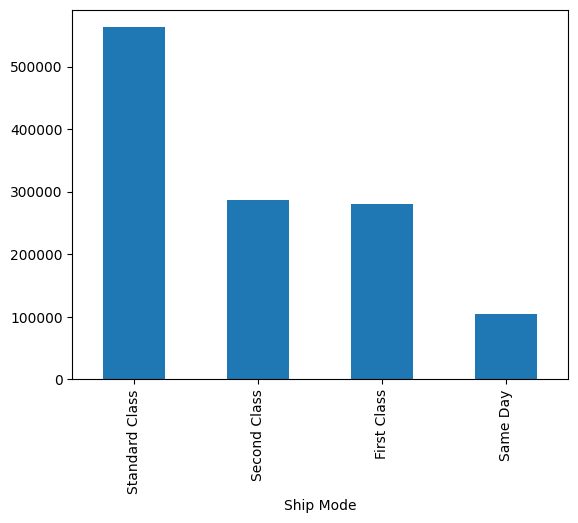

In [64]:
data.groupby('Ship Mode').Shipping_Cost.sum().sort_values(ascending = False).plot(kind='bar')

Since most people prefer Standard Class shipping, the shipping charges are also higher for this option.

# what is the maximum and minimum shipping cost?

In [66]:
data.groupby('Ship Mode').Shipping_Cost.min().sort_values(ascending = False)

Ship Mode
First Class       1.03
Second Class      1.03
Standard Class    1.02
Same Day          1.01
Name: Shipping_Cost, dtype: float64

Mimimum shipping cost is  1

In [68]:
data.groupby('Ship Mode').Shipping_Cost.max().sort_values(ascending = False)

Ship Mode
Second Class      923.63
First Class       915.49
Same Day          903.04
Standard Class    878.38
Name: Shipping_Cost, dtype: float64

The maximum shipping cost is around 930 and varies depending on the shipping mode.

# which category sold has sold most number of quantity?

In [69]:
data.groupby('Category').Quantity.sum().sort_values(ascending=False)

Category
Office Supplies    77048
Technology         31617
Furniture          30374
Name: Quantity, dtype: int64

<Axes: xlabel='Category'>

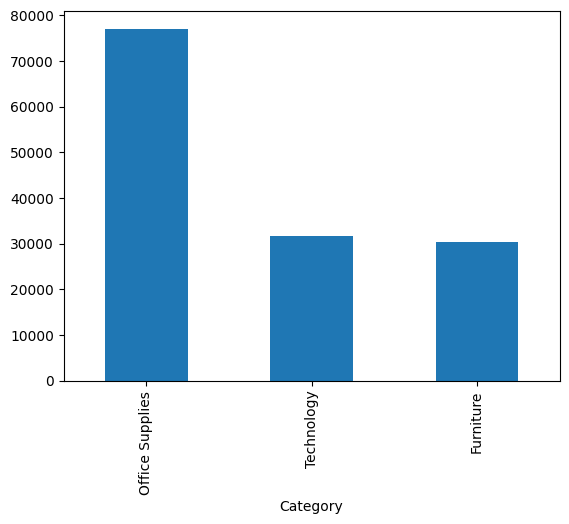

In [70]:
data.groupby('Category').Quantity.sum().sort_values(ascending=False).plot(kind='bar')

Office supplies has sold most no of quantities.

# Within the category which sub category products are ordered most of the times?

In [71]:
 pd.pivot_table(data, values='Quantity', index=['Category','sub_category'], aggfunc=sum)


Quantity
Category        sub_category          
Furniture       Bookcases         7900
                Chairs           11145
                Furnishings       8793
                Tables            2536
Office Supplies Appliances        5237
                Art              12593
                Binders          13061
                Envelopes         6080
                Fasteners         5302
                Labels            4579
                Paper             9248
                Storage          13953
                Supplies          6995
Technology      Accessories       9281
                Copiers           7327
                Machines          4626
                Phones           10383

Here’s the product with the most and least orders within each category:

Furniture:

Most Ordered: Chairs - 11,145 orders
Least Ordered: Tables - 2,536 orders
Office Supplies:

Most Ordered: Binders - 13,061 orders
Least Ordered: Labels - 4,579 orders
Technology:

Most Ordered: Phones - 10,383 orders
Least Ordered: Machines - 4,626 orders

# In which year the sale was highest ?

In [73]:
data.groupby('order_year').Sales.sum().sort_values(ascending = False).round()

order_year
2015    3876660.0
2014    3096752.0
2013    2401334.0
2012    1975576.0
Name: Sales, dtype: float64

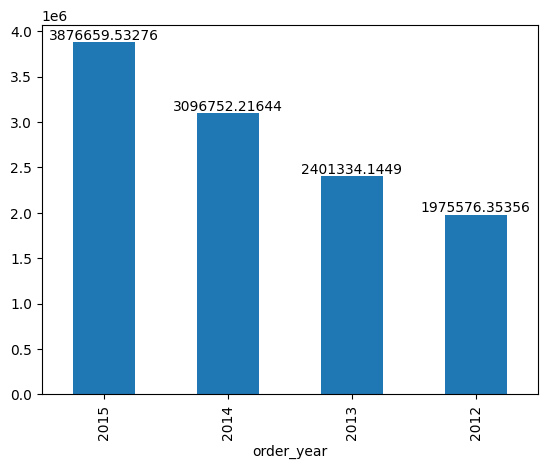

In [74]:
year_sale= data.groupby('order_year').Sales.sum().sort_values(ascending = False)
ax= year_sale.plot(kind='bar')
for i, value in enumerate(year_sale):
    ax.text(i,value + 0.1, str(value), ha='center', va='bottom')

The sales were highest in 2015, with 3,876,660.0, while the lowest was in 2012, with 1,975,576.0.

# How does different category performed in different year?

In [76]:
pd.pivot_table(data, index=['order_year', 'Category'], values='Sales', aggfunc= sum).round()

Sales
order_year Category                  
2012       Furniture         677020.0
           Office Supplies   563343.0
           Technology        735214.0
2013       Furniture         775446.0
           Office Supplies   683890.0
           Technology        941998.0
2014       Furniture        1032129.0
           Office Supplies   888291.0
           Technology       1176332.0
2015       Furniture        1272382.0
           Office Supplies  1129580.0
           Technology       1474697.0

<Axes: xlabel='Category', ylabel='Sales'>

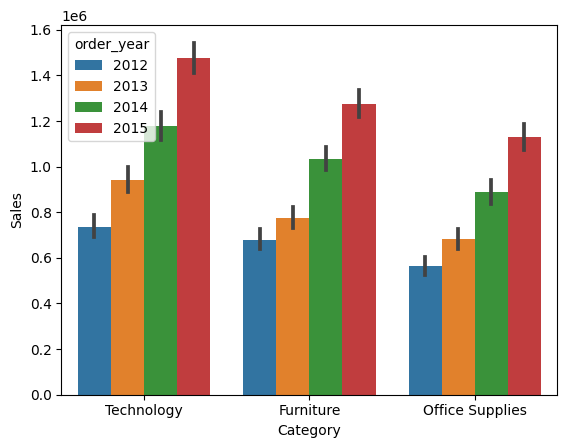

In [77]:
sns.barplot(data, x='Category', y= 'Sales', hue='order_year', estimator=sum)

Sales have shown a steady increase across different categories as the years progress.

# Year wise sales for category and sub_category ?

In [79]:
pd.pivot_table(data, values='Sales', index=['order_year','Category','sub_category'], aggfunc=sum).round()


Sales
order_year Category        sub_category          
2012       Furniture       Bookcases     250904.0
                           Chairs        252744.0
                           Furnishings    54133.0
                           Tables        119239.0
           Office Supplies Appliances    165318.0
...                                           ...
2015       Office Supplies Supplies       76271.0
           Technology      Accessories   223970.0
                           Copiers       514780.0
                           Machines      237408.0
                           Phones        498540.0

[68 rows x 1 columns]

C:\Users\bhargavi\AppData\Local\Temp\ipykernel_13004\2433390378.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data, x= 'sub_category', y='Sales', hue='order_year',ci=None, estimator= sum)


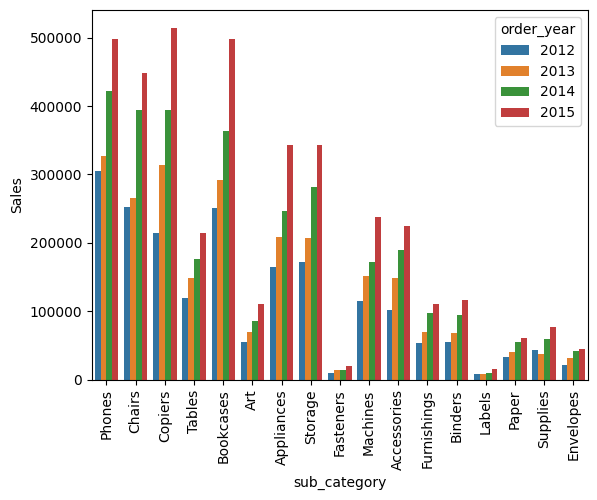

In [80]:
sns.barplot(data, x= 'sub_category', y='Sales', hue='order_year',ci=None, estimator= sum)
plt.xticks(rotation=90)
plt.show()

Sales of various subcategories, including Phones, Chairs, Tables, Bookcases, and Application Storages, saw an increase in both 2014 and 2015.

# Year wise profit

In [82]:
data.groupby('order_year').Profit.sum().sort_values(ascending= False)

order_year
2015    462864.40066
2014    376636.05184
2013    283046.90600
2012    221914.95526
Name: Profit, dtype: float64

# year wise profit for each category 

In [83]:
pd.pivot_table(data, index= ['order_year', 'Category'], values= 'Profit', aggfunc=sum).round()

Profit
order_year Category                 
2012       Furniture         51849.0
           Office Supplies   69626.0
           Technology       100440.0
2013       Furniture         57569.0
           Office Supplies   91387.0
           Technology       134090.0
2014       Furniture         83266.0
           Office Supplies  140240.0
           Technology       153131.0
2015       Furniture         88575.0
           Office Supplies  162523.0
           Technology       211766.0

<Axes: xlabel='Category', ylabel='Profit'>

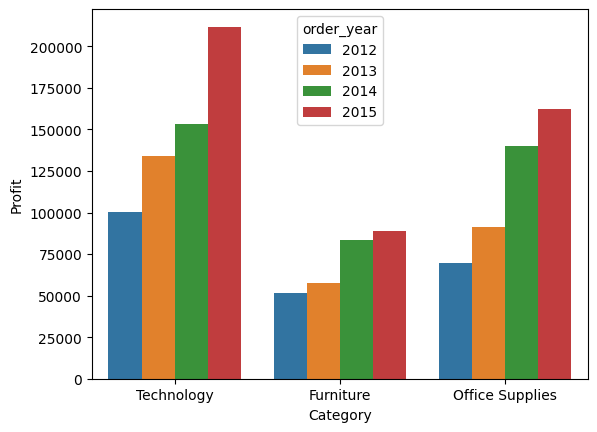

In [84]:
sns.barplot(data, x='Category', y= 'Profit', hue='order_year', estimator=sum,errorbar=None)

As sales gradually increased from 2012 to 2015, there was also a significant rise in profit.

# which category and sub category had the most profit year wise?

In [85]:
pd.pivot_table(data, values='Profit', index= ['order_year', 'Category', 'sub_category'], aggfunc=sum)

Profit
order_year Category        sub_category             
2012       Furniture       Bookcases     27700.23970
                           Chairs        26372.34290
                           Furnishings    6825.24720
                           Tables        -9048.71410
           Office Supplies Appliances    21103.59320
...                                              ...
2015       Office Supplies Supplies       7392.97840
           Technology      Accessories   36475.06990
                           Copiers       91009.14346
                           Machines      19589.63000
                           Phones        64692.10450

[68 rows x 1 columns]

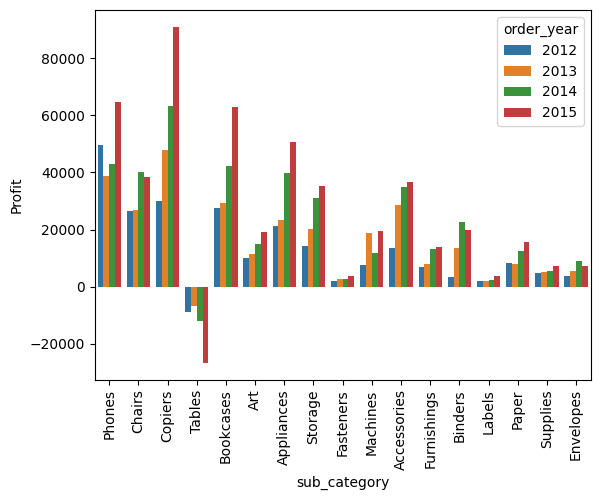

In [86]:
sns.barplot(data, x='sub_category', y='Profit', hue='order_year',errorbar=None,estimator=sum)
plt.xticks(rotation=90)
plt.show()

Profits for subcategories like Phones, Chairs, and Copiers have increased, while the profit for Tables has turned negative.

# how much if the profit in different Regions?

In [87]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'sub_category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Category-Updated', 'Profit Category', 'Shipping_Cost',
       'Order Priority', 'order_month', 'order_year', 'ship_month',
       'ship_year'],
      dtype='object')

In [88]:
data.groupby('Region').Profit.sum().sort_values(ascending= False)

Region
Western Europe       212501.03850
Eastern Asia         164597.63100
Southern Asia        156649.99000
Central America      153252.92380
Oceania              118511.47800
Northern Europe       81551.44200
Eastern Europe        74061.93000
Southern Europe       68369.39700
Western US            68101.98490
Eastern US            61833.58690
North Africa          54863.01000
Central Africa        34299.57000
Caribbean             33452.82208
South America         29416.07008
Southern US           25212.19370
Southern Africa       23312.61000
Eastern Africa        21838.14300
Southeastern Asia     21298.55340
Central US            17131.77540
Canada                10907.91000
Central Asia          -5841.27600
Western Africa       -38186.21700
Western Asia         -42674.25300
Name: Profit, dtype: float64

<Axes: xlabel='Region'>

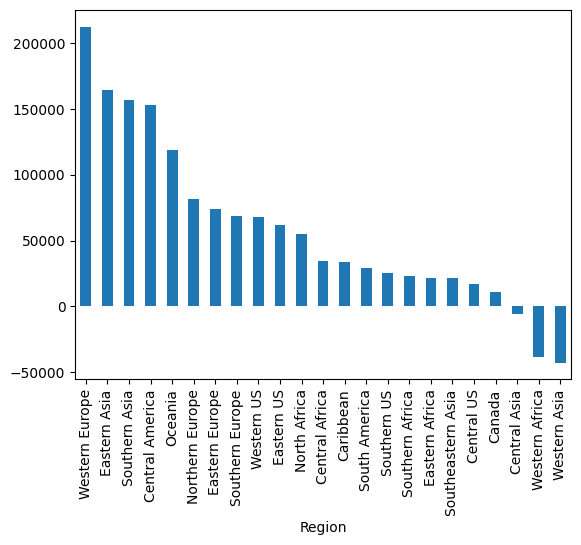

In [89]:
data.groupby('Region').Profit.sum().sort_values(ascending= False).plot(kind='bar')

Western Europe, Eastern Asia, and Southern Asia have high profits, while Western Africa and Western Asia show negative profits.

# How is the profit performing in different segments?

In [90]:
data.Segment.value_counts()

Consumer       18936
Corporate      11159
Home Office     6501
Name: Segment, dtype: int64

In [91]:
data.groupby('Segment').Profit.sum().sort_values(ascending= False)

Segment
Consumer       694265.17110
Corporate      402676.79310
Home Office    247520.34956
Name: Profit, dtype: float64

In terms of profit, the Consumer segment leads with 694,265.17, followed by Corporate with 402,676.79, and Home Office with 247,520.35.

# which market place have more profit

In [92]:
data.groupby('Market').Profit.sum().sort_values(ascending= False)

Market
Europe          436483.80750
Asia Pacific    412542.12340
LATAM           216121.81596
USCA            183187.45090
Africa           96127.11600
Name: Profit, dtype: float64

<Axes: xlabel='Market'>

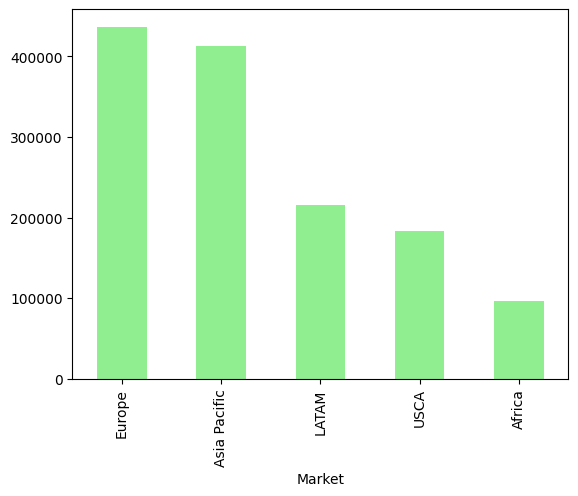

In [93]:
data.groupby('Market').Profit.sum().sort_values(ascending= False).plot(kind='bar', color='lightgreen')

In the marketplace, Europe and Asia Pacific generate higher profits, while Africa shows lower profits.

# which are the top 10 countries with highest profit?

In [94]:
data.groupby('Country').Profit.sum().sort_values(ascending= False).head(10)

Country
United States     172279.54090
China             148278.88500
India             126176.73000
United Kingdom    107799.72900
France            105183.28500
Germany           104708.65950
Australia         102345.87900
Mexico             97984.36444
Spain              53325.45300
El Salvador        40625.54336
Name: Profit, dtype: float64

<Axes: ylabel='Country'>

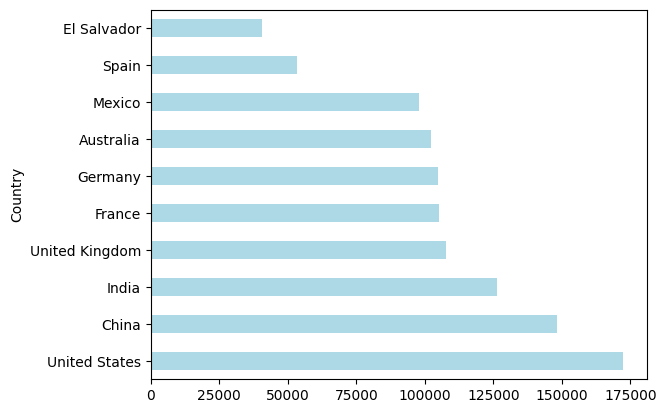

In [95]:
data.groupby('Country').Profit.sum().sort_values(ascending= False).head(10).plot(kind='barh', color='lightblue')

The United States leads in profit, followed by China and Indi,while El Salvador has the lowest profit

# Which are the bottom 10 countries with negative profit?

In [96]:
data.groupby('Country').Profit.sum().sort_values(ascending= False).tail(10)

Country
South Korea   -12254.15100
Philippines   -14587.97250
Sweden        -16411.60200
Panama        -17009.10448
Argentina     -17548.50052
Pakistan      -20696.91000
Honduras      -27995.06276
Netherlands   -39775.10100
Nigeria       -67342.34700
Turkey        -86107.33800
Name: Profit, dtype: float64

<Axes: xlabel='Country'>

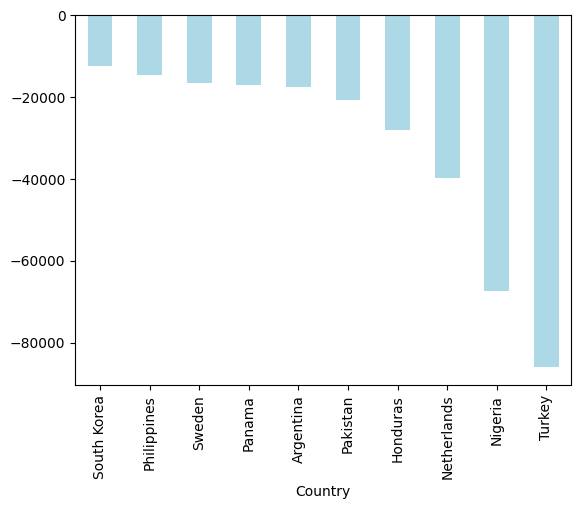

In [97]:
data.groupby('Country').Profit.sum().sort_values(ascending= False).tail(10).plot(kind='bar', color= 'lightblue')

South Korea, the Philippines, and Sweden are the countries with negative profit.

# How many phones sold, profit, sales?

In [98]:
phone_sales = data[data['sub_category']=='Phones']

In [99]:
phone_sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Profit Category-Updated,Profit Category,Shipping_Cost,Order Priority,order_month,order_year,ship_month,ship_year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,0.0,62.1544,Worse,Awesome,40.77,High,11,2014,11,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,Worse,Worse,915.49,Medium,10,2014,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,Worse,Worse,910.16,Medium,1,2014,1,2014
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,Sydney,New South Wales,...,0.1,763.2750,Worse,Worse,897.35,Critical,6,2014,7,2014
12,45794,SA-2012-MM7260110-41269,2012-12-26,2012-12-28,Second Class,MM-7260110,Magdelene Morse,Consumer,Jizan,Jizan,...,0.0,1151.4000,Good,Worse,832.41,Critical,12,2012,12,2012


In [100]:
# total no of phones
phone_sales.sub_category.value_counts()

Phones    2911
Name: sub_category, dtype: int64

In [101]:
pd.pivot_table(phone_sales, index=['sub_category', 'order_year'], values= ['Sales', 'Profit', 'Quantity'],aggfunc=sum)

Profit  Quantity        Sales
sub_category order_year                                   
Phones       2012        49460.5364      1928  304675.1007
             2013        38822.1611      2210  327282.5414
             2014        43036.0458      2797  421389.1185
             2015        64692.1045      3448  498539.6581

The sales, number of orders, and total revenue for Phones increased each year from 2012 to 2015.
- 2013: -21.5% decrease compared to 2012
- 2014: 10.8% increase compared to 2013
- 2015: 50.6% increase compared to 2014

# How many tables sold, their sales and profit?

In [104]:
table_sales= data[data['sub_category']=='Tables']

In [105]:
table_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Profit Category-Updated,Profit Category,Shipping_Cost,Order Priority,order_month,order_year,ship_month,ship_year
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,Hamilton,Waikato,...,0.0,996.4800,Worse,Worse,878.380,High,4,2013,4,2013
11,28879,ID-2013-AJ107801-41383,2013-04-19,2013-04-22,First Class,AJ-107801,Anthony Jacobs,Corporate,Kabul,Kabul,...,0.0,647.5500,Worse,Worse,835.570,High,4,2013,4,2013
20,46630,PL-2013-AB600103-41494,2013-08-08,2013-08-10,First Class,AB-600103,Ann Blume,Corporate,Bytom,Silesia,...,0.0,276.8400,Worse,Worse,759.470,Critical,8,2013,8,2013
25,3484,MX-2015-VD2167039-42252,2015-09-05,2015-09-08,First Class,VD-2167039,Valerie Dominguez,Consumer,Soyapango,San Salvador,...,0.2,526.4960,Worse,Worse,728.389,Critical,9,2015,9,2015
26,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,Taipei,Taipei City,...,0.0,720.3600,Worse,Worse,725.570,Critical,12,2012,12,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35611,38411,US-2014-LW16990140-41765,2014-05-06,2014-05-07,First Class,LW-169901404,Lindsay Williams,Corporate,Henderson,Nevada,...,0.0,320.3172,Worse,Worse,548.080,Critical,5,2014,5,2014
35616,32651,CA-2015-LW16990140-42129,2015-05-05,2015-05-10,Standard Class,LW-169901404,Lindsay Williams,Corporate,San Francisco,California,...,0.2,11.2839,Worse,Worse,15.000,Medium,5,2015,5,2015
35801,33574,CA-2012-LM17065140-41086,2012-06-26,2012-06-30,Standard Class,LM-170651408,Liz MacKendrick,Consumer,Southaven,Mississippi,...,0.0,22.3548,Worse,Worse,6.900,Medium,6,2012,6,2012
35908,39564,CA-2015-LP17095140-42035,2015-01-31,2015-02-07,Standard Class,LP-170951402,Liz Preis,Consumer,Aurora,Illinois,...,0.5,-47.1750,Worse,Worse,5.240,Medium,1,2015,2,2015


In [106]:
table_sales.sub_category.value_counts()

Tables    717
Name: sub_category, dtype: int64

In [107]:
pd.pivot_table(table_sales, index=['sub_category', 'order_year'], values= ['Sales', 'Profit', 'Quantity'],aggfunc=sum)

Profit  Quantity        Sales
sub_category order_year                                   
Tables       2012        -9048.7141       441  119239.1388
             2013        -6650.4680       524  148757.6268
             2014       -12147.0435       701  176985.3521
             2015       -26665.2189       870  215024.9018

The negative profit for Tables increased each year from 2012 to 2015, meaning the losses became larger.

# Analysis on INDIA

In [108]:
india_sales= data[data['Country']=='India']

In [109]:
india_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Profit Category-Updated,Profit Category,Shipping_Cost,Order Priority,order_month,order_year,ship_month,ship_year
29,22999,IN-2013-BP1123058-41329,2013-02-24,2013-02-24,Same Day,BP-1123058,Benjamin Patterson,Consumer,Surat,Gujarat,...,0.0,582.36,Worse,Worse,704.08,Critical,2,2013,2,2013
41,29272,IN-2015-BF1100558-42319,2015-11-11,2015-11-15,Standard Class,BF-1100558,Barry Franz,Home Office,Gorakhpur,Haryana,...,0.0,632.52,Worse,Worse,658.69,High,11,2015,11,2015
42,25795,IN-2015-VG2180558-42273,2015-09-26,2015-09-28,Second Class,VG-2180558,Vivek Grady,Corporate,Thiruvananthapuram,Kerala,...,0.0,2097.03,Good,Worse,658.35,Medium,9,2015,9,2015
48,28701,IN-2015-SW2027558-42125,2015-05-01,2015-05-01,Same Day,SW-2027558,Scott Williamson,Consumer,Jamshedpur,Jharkhand,...,0.0,500.01,Worse,Worse,637.86,Critical,5,2015,5,2015
55,29047,IN-2013-SG2047058-41424,2013-05-30,2013-05-31,First Class,SG-2047058,Sheri Gordon,Consumer,Bhopal,Madhya Pradesh,...,0.0,732.72,Worse,Worse,625.77,Critical,5,2013,5,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36494,23165,IN-2014-TS2143058-41808,2014-06-18,2014-06-24,Standard Class,TS-2143058,Tom Stivers,Corporate,Vijayawada,Andhra Pradesh,...,0.0,8.46,Worse,Worse,3.15,Medium,6,2014,6,2014
36508,20454,IN-2015-JW1522058-42270,2015-09-23,2015-09-27,Standard Class,JW-1522058,Jane Waco,Corporate,Barddhaman,West Bengal,...,0.0,20.55,Worse,Worse,3.14,Medium,9,2015,9,2015
36538,27162,IN-2012-AH1069058-41177,2012-09-25,2012-09-29,Standard Class,AH-1069058,Anna Häberlin,Corporate,Raipur,Uttarakhand,...,0.0,3.24,Worse,Worse,3.13,Medium,9,2012,9,2012
36558,26498,IN-2015-YS2188058-42136,2015-05-12,2015-05-18,Standard Class,YS-2188058,Yana Sorensen,Corporate,Hyderabad,Telangana,...,0.0,5.31,Worse,Worse,3.13,Low,5,2015,5,2015


# Total sales in india 

In [110]:
india_sales.Sales.sum().round()

577666.0

The total sales in India is 577,666.00.

# which shipping method is most prefered in India?

In [112]:
india_sales.value_counts('Ship Mode')

Ship Mode
Standard Class    784
Second Class      288
First Class       171
Same Day           58
dtype: int64

In [ ]:
india_sales.value_counts('Ship Mode').plot(kind='bar')

Standard class is the shipping mode prefered by indian.

# Maximum and minimum shipping cost in india?

In [114]:
data.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Market', 'Product ID', 'Category', 'sub_category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Profit Category-Updated', 'Profit Category', 'Shipping_Cost',
       'Order Priority', 'order_month', 'order_year', 'ship_month',
       'ship_year'],
      dtype='object')

In [115]:
india_sales.Shipping_Cost.min()

3.12

In [116]:
india_sales.Shipping_Cost.max()

704.08

In India, the minimum shipping cost is 3, while the maximum is 700.

# Profit in India 

In [117]:
india_sales.Profit.sum()

126176.73

The profit is india is 1,26,176.

# which segment is prefered in inida?

In [119]:
india_sales.value_counts('Segment')

Segment
Consumer       686
Corporate      355
Home Office    260
dtype: int64

consumer is the segment mostly prefered in India

# which category is most prefered in India?

In [120]:
india_sales.Category.value_counts()

Office Supplies    609
Technology         348
Furniture          344
Name: Category, dtype: int64

Office Supplies are prefered in india

# which sub categories are most preferred in india?

In [121]:
india_sales.sub_category.value_counts()

Chairs         134
Phones         118
Accessories     98
Bookcases       97
Storage         91
Furnishings     89
Paper           88
Copiers         83
Binders         83
Envelopes       73
Supplies        71
Art             59
Fasteners       57
Machines        49
Labels          46
Appliances      41
Tables          24
Name: sub_category, dtype: int64

In India, Chairs, Phones, and Accessories are the most preferred segments, while Appliances and Tables are the least preferred.

# Year wise sales in India

In [123]:
india_sales.groupby('order_year').Sales.sum().sort_values(ascending = False)

order_year
2015    201740.370
2014    149061.915
2013    138987.750
2012     87875.865
Name: Sales, dtype: float64

There has been a consistent increase in sales in India each year, with sales growing from 87,875.87 in 2012 to 201,740.37 in 2015.

# year and category wise sales in india

In [124]:
pd.pivot_table(india_sales, index=['order_year', 'Category'], values='Sales', aggfunc=sum)

Sales
order_year Category                  
2012       Furniture        33110.415
           Office Supplies  14293.665
           Technology       40471.785
2013       Furniture        47922.345
           Office Supplies  31323.690
           Technology       59741.715
2014       Furniture        52784.700
           Office Supplies  26222.625
           Technology       70054.590
2015       Furniture        80721.585
           Office Supplies  49903.695
           Technology       71115.090

# year wise profit in india

In [125]:
india_sales.groupby('order_year').Profit.sum().sort_values(ascending = False)

order_year
2015    48056.880
2014    32403.615
2013    27008.940
2012    18707.295
Name: Profit, dtype: float64

There has been a consistent increase in profit in India each year, with profits growing from 18,707.30 in 2012 to 48,056.88 in 2015.

# Year and category wise profit in india

In [126]:
pd.pivot_table(india_sales, index=['order_year', 'Category'], values='Profit', aggfunc=sum)

Profit
order_year Category                  
2012       Furniture         6404.145
           Office Supplies   3313.995
           Technology        8989.155
2013       Furniture         7846.935
           Office Supplies   6606.030
           Technology       12555.975
2014       Furniture         9272.670
           Office Supplies   6479.055
           Technology       16651.890
2015       Furniture        18625.365
           Office Supplies  11769.615
           Technology       17661.900

# State wise profit in India

In [127]:
india_sales.State.unique()

array(['Gujarat', 'Haryana', 'Kerala', 'Jharkhand', 'Madhya Pradesh',
       'Delhi', 'Uttarakhand', 'West Bengal', 'Bihar', 'Uttar Pradesh',
       'Chhattisgarh', 'Tamil Nadu', 'Maharashtra', 'Karnataka',
       'Rajasthan', 'Manipur', 'Andhra Pradesh', 'Jammu and Kashmir',
       'Telangana', 'Punjab', 'Odisha', 'Puducherry', 'Assam',
       'Chandigarh', 'Tripura'], dtype=object)

In [128]:
india_sales.groupby('State').Profit.sum().sort_values(ascending= False)

State
Uttar Pradesh        16802.22
Maharashtra          15253.95
Tamil Nadu            9774.00
Karnataka             9091.17
Gujarat               7944.63
Rajasthan             6833.19
Haryana               6497.94
Chhattisgarh          6345.84
Madhya Pradesh        6174.57
Bihar                 6004.08
Delhi                 5498.10
Kerala                4743.66
Andhra Pradesh        4512.18
Jharkhand             4005.36
Telangana             3349.14
Punjab                2958.87
Jammu and Kashmir     2830.32
West Bengal           2694.96
Uttarakhand           1487.73
Odisha                1382.70
Assam                  824.52
Puducherry             422.34
Manipur                354.42
Tripura                213.54
Chandigarh             177.30
Name: Profit, dtype: float64

<Axes: xlabel='State'>

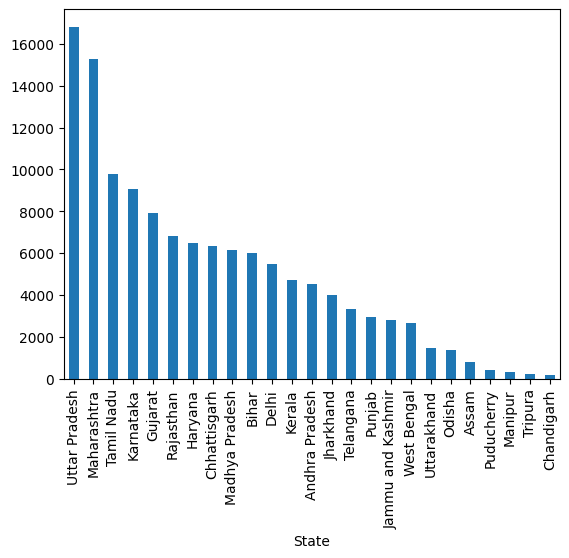

In [129]:
india_sales.groupby('State').Profit.sum().sort_values(ascending= False).plot(kind='bar')

Uttar Pradesh, Maharashtra, Tamil Nadu, and Karnataka have the highest profits, while Manipur, Tripura, and Chandigarh have the lowest profits.

# summary
- Sales and Performance:

Office Supplies leads in items sold, followed by Technology and Furniture.
Storage has the highest sales, with Art and Paper also performing well. Copiers are the least sold.
Staples outperforms Fellowes File Carts and Wire Frames by 69% in sales.

- Shipping and Costs:

Standard Class is the most popular shipping mode despite higher costs, ranging from 1 to 930.
Phones have the highest sales at approximately 1.55 million, while Labels have the lowest at around 40,100.
Top Products by Category:

- Furniture:

Bookcases with 1,404,026 in sales.
Office Supplies: Appliances with 963,849 in sales.
Technology: Phones with 1,551,886 in sales.

- Regional Insights:

Asia Pacific leads with 3.93 million in sales, while Africa has the lowest at 744,228.
Burundi has the highest sales among countries at 267.720, while Belize has the lowest at 57.720.
Western Europe has the highest regional sales at 1,691,004, while Central Asia has the lowest at 17,660.

- Profit Trends:

Profits increased each year from 2012 to 2015, with the highest in 2015 at 3,876,660.
Phones, Chairs, and Copiers saw rising profits, while Tables saw increasing negative profit.
Western Europe, Eastern Asia, and Southern Asia report high profits, whereas Western Africa and Western Asia show negative profits.

- India-Specific Insights:

Total sales in India are 577,666.00, with Standard Class being the preferred shipping mode.
Profit in India stands at 126,176, with consistent annual increases in sales and profit from 2012 to 2015.
Chairs, Phones, and Accessories are the most preferred segments in India, while Appliances and Tables are the least preferred.

- Conclusion

The market exhibits strong growth, particularly in Technology and Office Supplies. Rising profits in Asia Pacific and Western Europe highlight robust performance, while Tables' increasing negative profit suggests areas for improvement. In India, steady growth in Chairs and Phones reflects a positive market trend.